In [108]:
import pandas as pd
import requests
import meaningcloud
import time


key = "0134dc7e52f9fda9dc8c5332185285ec"

data = pd.read_csv("scraped_data.csv")
columns = ['sentence','sentiment','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
results = pd.DataFrame(columns=columns)


In [109]:
data

,body,condition,date,geolocation,source
0,What has helped me for more than two years wit...,happy tales: women with ibs-d page one,NaN,NaN,www.ibstales.com
1,"eval(ez_write_tag([[580,400],'ibstales_com-ban...",happy tales: women with ibs-d page one,NaN,NaN,www.ibstales.com
2,I have suffered for a number of years from wha...,happy tales: women with ibs-d page one,NaN,NaN,www.ibstales.com
3,I was first diagnosed with IBS after drinking ...,happy tales: women with ibs-d page one,NaN,NaN,www.ibstales.com
4,"Firstly I must say, what a relief to find this...",happy tales: women with ibs-d page two,NaN,NaN,www.ibstales.com
5,"eval(ez_write_tag([[336,280],'ibstales_com-med...",happy tales: women with ibs-d page two,NaN,NaN,www.ibstales.com
6,I fortunately have a success story. It is so w...,happy tales: women with ibs-d page two,NaN,NaN,www.ibstales.com
7,Hi there. I was diagnosed with IBS about two y...,happy tales: women with ibs-d page two,NaN,NaN,www.ibstales.com
8,I was recently diagnosed with IBS. I'm 20 year...,happy tales: women with ibs-d page three,NaN,NaN,www.ibstales.com
9,"eval(ez_write_tag([[336,280],'ibstales_com-box...",happy tales: women with ibs-d page three,NaN,NaN,www.ibstales.com


In [110]:
text = data['body'][0]
results['sentence'] = data['body']

In [111]:
text

"What has helped me for more than two years with almost daily attacks of diarrhea is calcium in the form of Caltrate Plus. Calcium is known to be constipating so if you suffer from constipation-type IBS do not take it. Here is the what and how to take the calcium information if you suffer from diarrhea.eval(ez_write_tag([[336,280],'ibstales_com-medrectangle-3','ezslot_0']));Calcium is an over the counter supplement we all do not usually get enough of. No prescription needed to purchase this. When you take calcium about 40 per cent of the dose gets to the bones, the rest is eliminated in our waste. The calcium goes to the intestines and soaks up excess fluids and binds them together and they are gotten rid of in our waste.eval(ez_write_tag([[336,280],'ibstales_com-medrectangle-4','ezslot_3']));This is a process that can be continued by taking the calcium carbonate on a regular basis thus giving a more formed bowel movement. There is calcium carbonate which helps us with diarrhea and the

In [112]:
def sentiment(index):
    sentiment_response = meaningcloud.SentimentResponse(meaningcloud.SentimentRequest(key, lang='en', txt=results['sentence'][index], txtf='plain').sendReq())
    sentiment_response.getResults()
    if (sentiment_response.isSuccessful()):
        print("\nThe request to 'Sentiment' finished successfully!\n")
        sentiment_results = sentiment_response.getResults()
        sentiment = sentiment_results['score_tag']
        
        if (sentiment):
            print("sentiment:" + sentiment)
            results['sentiment'][index] = sentiment
        else:
            print("\nOh no! There was the following error: " + sentiment_results.getStatusMsg() + "\n")

In [113]:
# If there are no errors in the request, we print the output
def concept(index):
    concept_response =  meaningcloud.TopicsResponse(meaningcloud.TopicsRequest(key, txt=results['sentence'][index], lang='en', topicType='c').sendReq())
    concept_response.getResults()
    if (concept_response.isSuccessful()):
        print("\nThe request to 'Concept Extraction' finished successfully!\n")

        concepts = concept_response.getConcepts()
        conceptList = []
        if (concepts):
            print("\tConcepts detected (Index: "+ str(index) + ", length: " + str(len(concepts)) + "):\n")
            if len(concepts)<10:
                for i in range(0,len(concepts)):
                    print("\t\t" + concept_response.getTopicForm(concepts[i]) + ' --> ' + concept_response.getTypeLastNode(concept_response.getOntoType(concepts[i])) + "\n")
                    results[str(i+1)][index] = concept_response.getTopicForm(concepts[i])
#                     conceptList.append(concept_response.getTopicForm(concepts[i]))
            else:  
                for i in range(0,10):
                    print("\t\t" + concept_response.getTopicForm(concepts[i]) + ' --> ' + concept_response.getTypeLastNode(concept_response.getOntoType(concepts[i])) + "\n")
                    results[str(i+1)][index] = concept_response.getTopicForm(concepts[i])
#                     conceptList.append(concept_response.getTopicForm(concepts[i]))
        else:
            print("\nOh no! There was the following error: " + concept_response.getStatusMsg() + "\n")
    else:
        if(concept_response.getResponse() is None):
            print("\nOh no! The request sent did not return a Json\n")
        else:
            print("\nOh no! There was the following error: " + concept_response.getStatusMsg() + "\n")

In [115]:
for index, row in results.iterrows():
    concept(index)
    time.sleep(.5)


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 0, length: 47):

		calcium --> ChemicalElement

		meal --> Food

		side effect --> Top

		pill --> Drug

		tablet --> Product

		tablet --> ElectronicDevice

		carbonate --> ChemicalCompound

		magnesium --> ChemicalElement

		bone --> BodyPart

		attack --> War


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 1, length: 44):

		attack --> Process

		attack --> Disease

		attack --> War

		friend --> Person

		attack --> Offence

		mineral water --> Top

		exam --> Event

		email --> Email

		rice --> Flora

		rice --> FruitOrVegetable


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 2, length: 42):

		pain --> Disease

		doctor --> Title

		doctor --> Vocation

		sugar product --> Product

		ice cream --> CookedPlate

		pound --> WeightUnit

		food --> Food

		stress --> Disease

		pound sterling --> Currency

		home --


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 26, length: 23):

		enzyme --> Top

		diet --> Top

		email --> Email

		check --> Printing

		stage --> Facility

		pain --> Disease

		snack --> Food

		meal --> Food

		pill --> Drug

		tablet --> Product


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 27, length: 79):

		husband --> Person

		gas --> Top

		product --> Product

		toilet --> Facility

		infection --> Disease

		medical care --> Top

		food poisoning --> Disease

		chronic fatigue --> Top

		home --> Facility

		sugar --> Food


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 28, length: 44):

		diet --> Top

		food --> Food

		brown --> Color

		email --> Email

		class --> Top

		stratum --> Top

		stratum --> Top

		fruit --> FruitOrVegetable

		high --> Top

		doctor --> Title


The request to 'Concept Extraction' finished successfully!

	Concepts 


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 52, length: 14):

		carbonate --> ChemicalCompound

		doctor --> Vocation

		doctor --> Title

		building --> Facility

		property --> Top

		calcium --> ChemicalElement

		sodium --> ChemicalElement

		bicarbonate --> Top

		medication --> Top

		home --> Facility


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 53, length: 55):

		people --> Person

		home --> Facility

		stomach --> BodyPart

		toilet --> Facility

		email --> Email

		rice --> Flora

		person --> Person

		tea --> Flora

		exercise --> Top

		exam --> Event


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 54, length: 45):

		body --> Top

		side effect --> Top

		email --> Email

		food --> Food

		trigger --> Part

		flora --> Top

		heart --> BodyPart

		valve --> Top

		vitamin --> Substance

		antibiotic --> Drug


The request to 'Concept Extract


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 79, length: 32):

		food --> Food

		beverage --> Beverage

		skin --> BodyPart

		allergy --> Disease

		people --> Person

		tablet --> ElectronicDevice

		tablet --> Product

		pill --> Drug

		fish and chips --> CookedPlate

		diet --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 80, length: 6):

		doctor --> Vocation

		doctor --> Title

		woman --> Person

		stomach --> BodyPart

		pain --> Disease

		home --> Facility


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 81, length: 27):

		pain --> Disease

		exam --> Event

		email --> Email

		bile --> Top

		doctor --> Title

		doctor --> Vocation

		consultant --> Vocation

		adviser --> Vocation

		nuclear medicine --> Top

		tale --> Composition


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 82, length: 17):

		e


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 105, length: 36):

		Summer --> Timex

		home --> Facility

		mother --> Person

		exam --> Event

		uncle --> Person

		flu --> Disease

		child --> Person

		toilet --> Facility

		doctor --> Vocation

		doctor --> Title


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 106, length: 34):

		meeting --> Event

		job --> Vocation

		condition --> Top

		stomach --> BodyPart

		question --> Top

		team --> SportsTeam

		team --> Organization

		factory --> Facility

		telephone --> PhoneNumber

		appointment --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 107, length: 11):

		anxiety --> Disease

		stomach --> BodyPart

		gastroenterologist --> Vocation

		exam --> Event

		constipation --> Disease

		system --> MethodSystem

		cramp --> Disease

		regular --> Person

		lax --> Person

		bear --> Mammal


The requ


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 131, length: 51):

		constipation --> Disease

		exercise --> Top

		wedding --> Occasion

		side effect --> Top

		email --> Email

		waist --> BodyPart

		waist --> Part

		cup --> Games

		aloe --> Flora

		stomach --> BodyPart


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 132, length: 14):

		skin --> BodyPart

		email --> Email

		ear --> BodyPart

		throat --> BodyPart

		expert --> Person

		allergy --> Disease

		exam --> Event

		allergic --> Top

		infection --> Disease

		acne --> Disease


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 133, length: 25):

		tale --> Composition

		email --> Email

		exam --> Event

		body --> Top

		cheese --> DairyProduct

		update --> Process

		God --> God

		risk --> Top

		syrup --> CookedPlate

		corn --> Flora


The request to 'Concept Extraction' finished successful


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 157, length: 31):

		email --> Email

		diet --> Top

		product --> Product

		friend --> Person

		social life --> Top

		sweet --> CookedPlate

		biscuit --> CookedPlate

		sauce --> CookedPlate

		soup --> CookedPlate

		CEREAL#2 --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 158, length: 6):

		protocol --> Top

		email --> Email

		side effect --> Top

		market --> Market

		treatment --> Top

		brain --> BodyPart


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 159, length: 9):

		exam --> Event

		celiac --> BodyPart

		email --> Email

		celiac disease --> Disease

		endoscopy --> Top

		result --> Top

		gas --> Top

		expert --> Person

		blood --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 160, length: 14):

		email --> Email

		representative --> Voc


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 183, length: 46):

		toilet --> Facility

		people --> Person

		depression --> Disease

		accident --> Event

		university --> University

		attack --> Process

		attack --> Disease

		attack --> War

		attack --> Offence

		depression --> Basin


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 184, length: 14):

		toilet --> Facility

		nausea --> Disease

		people --> Person

		dog --> Mammal

		food --> Food

		noodle --> CookedPlate

		burger --> CookedPlate

		job --> Vocation

		tablet --> ElectronicDevice

		tablet --> Product


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 185, length: 19):

		attack --> War

		attack --> Disease

		attack --> Process

		attack --> Offence

		pain --> Disease

		email --> Email

		stomach --> BodyPart

		toilet --> Facility

		school --> School

		cramp --> Disease


The request


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 209, length: 38):

		toilet --> Facility

		doctor --> Vocation

		doctor --> Title

		people --> Person

		clam --> Invertebrate

		iron --> ChemicalElement

		child --> Person

		mother --> Person

		stomach --> BodyPart

		pain --> Disease


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 210, length: 40):

		job --> Vocation

		doctor --> Vocation

		doctor --> Title

		line --> Top

		colon cancer --> Top

		email --> Email

		stress --> Disease

		home --> Facility

		foreman --> Vocation

		factory --> Facility


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 211, length: 34):

		pain --> Disease

		attack --> Process

		attack --> Disease

		attack --> War

		attack --> Offence

		fast food --> Food

		people --> Person

		condition --> Top

		email --> Email

		cramp --> Disease


The request to 'Concept Extracti


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 235, length: 50):

		pain --> Disease

		attack --> Offence

		pill --> Drug

		attack --> War

		home --> Facility

		attack --> Disease

		weight --> WeightUnit

		weight --> Top

		attack --> Process

		God --> God


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 236, length: 40):

		diet --> Top

		email --> Email

		boyfriend --> Person

		weight --> Top

		weight --> WeightUnit

		side effect --> Top

		family --> Organization

		restaurant --> Restaurants

		brewery --> Facility

		people --> Person


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 237, length: 21):

		email --> Email

		boyfriend --> Person

		long term --> Top

		attack --> Offence

		supportive --> Top

		family --> Organization

		security --> Top

		psychological --> Top

		toilet --> Facility

		attack --> Process


The request to 'Concept Ex


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 261, length: 13):

		job --> Vocation

		disability --> Top

		education --> Top

		toilet --> Facility

		email --> Email

		flat --> Top

		flat --> Facility

		rejection --> Top

		rejection --> Top

		letter --> Composition


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 262, length: 39):

		doctor --> Vocation

		doctor --> Title

		home --> Facility

		attack --> Process

		attack --> Offence

		attack --> War

		attack --> Disease

		aircraft --> Aircraft

		people --> Person

		tale --> Composition


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 263, length: 69):

		doctor --> Vocation

		doctor --> Title

		people --> Person

		attack --> Offence

		attack --> War

		attack --> Disease

		attack --> Process

		brace --> Top

		email --> Email

		stomach --> BodyPart


The request to 'Concept Extraction' finish


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 288, length: 10):

		pain --> Disease

		doctor --> Vocation

		doctor --> Title

		endoscopy --> Top

		food --> Food

		tale --> Composition

		diet --> Top

		left --> Address

		stage --> Facility

		finger --> BodyPart


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 289, length: 27):

		doctor --> Title

		doctor --> Vocation

		job --> Vocation

		toilet --> Facility

		job interviews --> CommunicationProcess

		Crohn's disease --> Disease

		email --> Email

		kiosk --> Market

		stall --> Facility

		pain --> Disease


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 290, length: 27):

		antibiotic --> Drug

		home --> Facility

		job --> Vocation

		email --> Email

		infection --> Disease

		doctor --> Vocation

		doctor --> Title

		friend --> Person

		boyfriend --> Person

		university --> University


The re


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 314, length: 21):

		email --> Email

		social life --> Top

		exercise --> Top

		government --> Top

		toilet --> Facility

		home --> Facility

		nausea --> Disease

		spell --> Process

		child --> Person

		surgery --> Academic


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 315, length: 23):

		disease --> Disease

		people --> Person

		doctor --> Vocation

		doctor --> Title

		home --> Facility

		food --> Food

		tale --> Composition

		friend --> Person

		professor --> Title

		question --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 316, length: 45):

		pain --> Disease

		.doc --> Top

		partner --> Person

		charcoal --> Mineral

		tale --> Composition

		toilet --> Facility

		constipation --> Disease

		attack --> Process

		attack --> Disease

		attack --> War


The request to 'Concept Extract


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 340, length: 24):

		pain --> Disease

		email --> Email

		God --> God

		body --> Top

		medicine --> Academic

		condition --> Top

		drug --> Drug

		husband --> Person

		doctor --> Vocation

		storm --> NaturalPhenomena


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 341, length: 40):

		son --> Person

		exam --> Event

		God --> God

		nausea --> Disease

		boy --> Person

		bed --> Channel

		email --> Email

		medication --> Top

		constipation --> Disease

		pain --> Disease


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 342, length: 17):

		pain --> Disease

		email --> Email

		stomach --> BodyPart

		drug --> Drug

		medicine --> Academic

		female --> Top

		knife --> Product

		doctor --> Vocation

		doctor --> Title

		job --> Vocation


The request to 'Concept Extraction' finished successfully!

	Con


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 366, length: 27):

		doctor --> Vocation

		email --> Email

		doctor --> Title

		pain --> Disease

		toilet --> Facility

		stomach --> BodyPart

		job --> Vocation

		side effect --> Top

		throat --> BodyPart

		medication --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 367, length: 143):

		job --> Vocation

		spell --> Process

		attack --> Offence

		pain --> Disease

		attack --> War

		attack --> Disease

		home --> Facility

		attack --> Process

		doctor --> Title

		toilet --> Facility


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 368, length: 13):

		medication --> Top

		person --> Person

		trip --> Top

		constipation --> Disease

		doctor --> Vocation

		doctor --> Title

		mother --> Person

		email --> Email

		shelf --> Product

		drug --> Drug


The request to 'Concept Extraction' finishe


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 392, length: 28):

		stomach --> BodyPart

		system --> MethodSystem

		constipation --> Disease

		doctor --> Vocation

		doctor --> Title

		myocardial infarction --> Disease

		email --> Email

		gas --> Top

		fatigue --> Top

		body --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 393, length: 40):

		parent --> Person

		toilet --> Facility

		teacher --> Vocation

		teacher --> Vocation

		child --> Person

		school --> School

		pain --> Disease

		doctor --> Vocation

		doctor --> Title

		home --> Facility


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 394, length: 23):

		baby --> Person

		email --> Email

		bottle --> Container

		dump --> Location

		mother --> Person

		magnesium --> ChemicalElement

		pound --> WeightUnit

		pound sterling --> Currency

		gallon --> VolumeUnit

		people --> Pers


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 418, length: 34):

		stomach --> BodyPart

		exam --> Event

		job --> Vocation

		email --> Email

		bug --> Damaging

		bug --> Animal

		car --> Car

		diet --> Top

		doctor --> Title

		doctor --> Vocation


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 419, length: 20):

		email --> Email

		tongue --> BodyPart

		fast food --> Food

		geographic --> Top

		food --> Food

		Chinese --> Top

		fried --> CookedPlate

		onion --> FruitOrVegetable

		onion --> Flora

		exercise --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 420, length: 30):

		stratum --> Top

		stratum --> Top

		class --> Top

		doctor --> Title

		doctor --> Vocation

		email --> Email

		liquid --> Top

		athletic --> Top

		book --> Book

		disorder --> Disease


The request to 'Concept Extraction' finished successfully!

	Concepts det


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 444, length: 35):

		pain --> Disease

		email --> Email

		stomach --> BodyPart

		anxiety --> Disease

		valve --> Top

		shirt --> Clothes

		catheter --> Instrument

		medication --> Top

		Coca-Cola --> Beverage

		coke --> Substance


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 445, length: 54):

		email --> Email

		caramel --> CookedPlate

		toilet --> Facility

		cramp --> Disease

		blue --> Color

		candy --> CookedPlate

		constipation --> Disease

		sweet --> CookedPlate

		stress --> Disease

		band --> Organization


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 446, length: 10):

		pain --> Disease

		cramp --> Disease

		email --> Email

		stomach --> BodyPart

		doctor --> Vocation

		doctor --> Title

		diet --> Top

		personality --> Person

		head --> BodyPart

		head --> Title


The request to '


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 470, length: 46):

		pill --> Drug

		kind --> Class

		kind --> Organization

		stomach --> BodyPart

		chicken --> Bird

		tale --> Composition

		doctor --> Title

		doctor --> Vocation

		corn --> Flora

		corn --> FruitOrVegetable


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 471, length: 16):

		toilet --> Facility

		pain --> Disease

		home --> Facility

		clinic --> Facility

		school --> School

		people --> Person

		adult --> Person

		chance --> OtherEntity

		bag --> Accessory

		chip --> Product


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 472, length: 30):

		ice cream --> CookedPlate

		lactose intolerance --> Top

		coffee --> Beverage

		pill --> Drug

		fruit juice --> Top

		enzyme --> Top

		attack --> Offence

		attack --> War

		attack --> Disease

		attack --> Process


The request to 'Con


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 496, length: 17):

		people --> Person

		email --> Email

		school --> School

		toilet --> Facility

		diet --> Top

		depression --> Disease

		depression --> Basin

		suicide --> Top

		room --> Facility

		room --> Facility


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 497, length: 14):

		doctor --> Vocation

		doctor --> Title

		email --> Email

		anxiety --> Disease

		exam --> Event

		cat --> Mammal

		scan --> Top

		blood --> Top

		therapeutist --> Vocation

		stress --> Disease


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 498, length: 32):

		pain --> Disease

		doctor --> Vocation

		doctor --> Title

		stomach --> BodyPart

		school --> School

		parent --> Person

		pill --> Drug

		teacher --> Vocation

		people --> Person

		child --> Person


The request to 'Concept Extraction' finished succes


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 523, length: 56):

		cramp --> Disease

		stomach --> BodyPart

		job --> Vocation

		toilet --> Facility

		virus --> LivingThing

		friend --> Person

		home --> Facility

		doctor --> Title

		email --> Email

		stress --> Disease


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 524, length: 85):

		school --> School

		tale --> Composition

		pain --> Disease

		professional --> Top

		attention deficit disorder --> Disease

		constipation --> Disease

		school attendance --> Top

		diagnosis --> Top

		kid --> Person

		people --> Person


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 525, length: 15):

		doctor --> Vocation

		doctor --> Title

		mother --> Person

		email --> Email

		migraine --> Disease

		blood --> Top

		job --> Vocation

		kid --> Person

		parent --> Person

		home --> Facility


The reques


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 549, length: 34):

		toilet --> Facility

		home --> Facility

		friend --> Person

		stomach --> BodyPart

		food --> Food

		daily routine --> Top

		family --> Organization

		job --> Vocation

		cocktail --> Beverage

		cocktail --> Event


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 550, length: 31):

		toilet --> Facility

		doctor --> Vocation

		doctor --> Title

		pain --> Disease

		social life --> Top

		daily life --> Top

		kind --> Class

		diet --> Top

		friend --> Person

		therapeutic --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 551, length: 32):

		toilet --> Facility

		constipation --> Disease

		exercise --> Top

		home --> Facility

		program --> Broadcast

		bag --> Accessory

		gram --> WeightUnit

		juice --> Beverage

		partner --> Person

		job --> Vocation


The request to 'Con


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 576, length: 21):

		friend --> Person

		plan --> Plan

		toilet --> Facility

		request --> Top

		food --> Food

		fearful --> Person

		medication --> Top

		doctor --> Title

		doctor --> Vocation

		people --> Person


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 577, length: 9):

		street --> Line

		road --> Line

		road --> Line

		pregnant --> Person

		people --> Person

		Working Hours --> Top

		event --> Event

		pain --> Disease

		request --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 578, length: 12):

		pain --> Disease

		baby --> Person

		constipation --> Disease

		teenager --> Person

		toilet --> Facility

		fierce --> Top

		nausea --> Disease

		indigestion --> Disease

		stomach --> BodyPart

		energy --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts de


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 602, length: 13):

		diet --> Top

		cramp --> Disease

		nausea --> Disease

		constipation --> Disease

		coffee --> Beverage

		person --> Person

		tablet --> ElectronicDevice

		tablet --> Product

		pill --> Drug

		doctor --> Vocation


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 603, length: 7):

		subject --> Top

		stomach --> BodyPart

		head --> BodyPart

		head --> Title

		family --> Organization

		husband --> Person

		toilet --> Facility


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 604, length: 35):

		research --> Top

		doctor --> Title

		doctor --> Vocation

		bill --> Top

		medical care --> Top

		legislative process --> Top

		agreement --> Contract

		train --> Train

		center --> Facility

		center --> Location


The request to 'Concept Extraction' finished successfully!

	Concepts detect


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 630, length: 61):

		disease --> Disease

		people --> Person

		plug --> Product

		treatment --> Top

		doctor --> Title

		baseball --> Sports

		player --> Person

		doctor --> Vocation

		tale --> Composition

		food poisoning --> Disease


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 631, length: 82):

		doctor --> Vocation

		doctor --> Title

		flux --> Substance

		food --> Food

		pill --> Drug

		acid --> Substance

		diaphragm --> Part

		diaphragm --> Product

		diaphragm --> BodyPart

		exam --> Event


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 632, length: 8):

		body --> Top

		pain --> Disease

		nausea --> Disease

		shower --> NaturalPhenomena

		stomach --> BodyPart

		start --> Process

		kind --> Organization

		kind --> Class


The request to 'Concept Extraction' finished successfully!

	Con


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 656, length: 53):

		weight --> WeightUnit

		weight --> Top

		exam --> Event

		B12 --> Substance

		diagnosis --> Top

		culprit --> Person

		doctor --> Title

		doctor --> Vocation

		medical --> Top

		diet --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 657, length: 21):

		pain --> Disease

		anus --> BodyPart

		stomach --> BodyPart

		attack --> Offence

		car --> Car

		region --> GeographicalEntity

		constipation --> Disease

		defamation --> Offence

		psychiatrist --> Vocation

		condition --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 658, length: 21):

		pain --> Disease

		anus --> BodyPart

		stomach --> BodyPart

		attack --> Offence

		car --> Car

		region --> GeographicalEntity

		constipation --> Disease

		defamation --> Offence

		psychiatrist --> Vocation

		condition --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 682, length: 71):

		nephew --> Person

		home --> Facility

		child --> Person

		recovery --> Top

		bed --> Channel

		family --> Organization

		stomach --> BodyPart

		transplant --> Top

		mother --> Person

		professor --> Title


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 683, length: 15):

		diabetic --> Person

		doctor --> Vocation

		doctor --> Title

		research --> Top

		disorder --> Disease

		insulin --> Top

		trip --> Top

		person --> Person

		husband --> Person

		mill --> Facility


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 684, length: 1):

		tale --> Composition


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 685, length: 24):

		gastritis --> Disease

		medication --> Top

		meal --> Food

		head --> Title

		head --> BodyPart

		pain --> Disease



The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 709, length: 10):

		pain --> Disease

		constipation --> Disease

		toilet --> Facility

		pressure --> Top

		diet --> Top

		trigger --> Part

		job --> Vocation

		kind --> Organization

		kind --> Class

		guy --> Person


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 710, length: 9):

		diet --> Top

		lifestyle --> Top

		research --> Top

		hemp --> Flora

		bake --> Top

		world --> Planet

		people --> Person

		kid --> Person

		disorder --> Disease


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 711, length: 15):

		heart --> BodyPart

		disorder --> Disease

		pain --> Disease

		head --> BodyPart

		head --> Title

		people --> Person

		place --> Location

		fever --> Disease

		post --> Top

		infection --> Disease


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 736, length: 18):

		garment --> Clothes

		stomach --> BodyPart

		people --> Person

		plug --> Product

		job --> Vocation

		professional --> Top

		depressing --> Top

		expert --> Person

		coffee --> Beverage

		beverage --> Beverage


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 737, length: 26):

		pizza --> CookedPlate

		flux --> Substance

		weight --> WeightUnit

		weight --> Top

		teenager --> Person

		plug --> Product

		acid --> Substance

		fast food --> Food

		transformed food --> Top

		restaurant --> Restaurants


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 738, length: 7):

		pain --> Disease

		toilet --> Facility

		diverticulitis --> Disease

		medication --> Top

		doctor --> Vocation

		doctor --> Title

		tale --> Composition


The request to 'Concept Extraction' finished successfully!



The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 762, length: 16):

		weight --> WeightUnit

		weight --> Top

		diagnosis --> Top

		activity --> Process

		diet --> Top

		athletic --> Top

		kind --> Class

		bacterial --> Top

		infection --> Disease

		result --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 763, length: 4):

		stomach --> BodyPart

		gas --> Top

		food --> Food

		toilet --> Facility


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 764, length: 58):

		accident --> Event

		job --> Vocation

		accident at work --> Event

		adult --> Person

		long term --> Top

		social norm --> Top

		side effect --> Top

		colon cancer --> Top

		bed --> Channel

		disease --> Disease


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 765, length: 40):

		doctor --> Title

		doctor --> Vocation

		condition --> Top



The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 788, length: 1):

		removal --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 789, length: 17):

		pain --> Disease

		endoscopy --> Top

		exam --> Event

		Primary Care --> Top

		calculus --> Disease

		doctor --> Title

		doctor --> Vocation

		digestion --> Top

		sphincter --> BodyPart

		bile --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 790, length: 9):

		online --> Top

		demand --> Top

		lawsuit --> Top

		manufacturer --> Vocation

		risk --> Top

		long term --> Top

		box --> Container

		box --> Top

		drug --> Drug


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 791, length: 25):

		diet --> Top

		food --> Food

		taxi --> Top

		drug --> Drug

		allergic --> Top

		fast food --> Food

		clinic --> Facility

		bake --> Top

		Asian --> Top

		ga


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 816, length: 22):

		insurance --> Top

		mistake --> OtherEntity

		food --> Food

		social life --> Top

		hospital stay --> Top

		nutrition --> Top

		medical --> Top

		head --> Title

		head --> BodyPart

		call --> Top


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 817, length: 9):

		toilet --> Facility

		friend --> Person

		span --> PhysicalExtentUnit

		pound sterling --> Currency

		pound --> WeightUnit

		weight --> WeightUnit

		weight --> Top

		chance --> OtherEntity

		cramp --> Disease


The request to 'Concept Extraction' finished successfully!

	Concepts detected (Index: 818, length: 47):

		accident --> Event

		shorts --> Clothes

		bus --> Vehicle

		friend --> Person

		short --> Person

		path --> Line

		course --> Top

		jeans --> Clothes

		couple --> Organization

		alcohol --> Top


The request to 'Concept Extraction' finished 

In [155]:
for index, row in results.iterrows():
    sentiment(index)
    time.sleep(.5)


The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment


The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' 


The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' fini


The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' 


The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' 


The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Senti


The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:P

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sentiment' finished successfully!

sentiment:N

The request to 'Sentiment' finished successfully!

sentiment:NEU

The request to 'Sen

In [121]:
results

,sentence,sentiment,1,2,3,4,5,6,7,8,9,10
0,What has helped me for more than two years wit...,P,calcium,meal,side effect,pill,tablet,tablet,carbonate,magnesium,bone,attack
1,"eval(ez_write_tag([[580,400],'ibstales_com-ban...",N,attack,attack,attack,friend,attack,mineral water,exam,email,rice,rice
2,I have suffered for a number of years from wha...,NEU,pain,doctor,doctor,sugar product,ice cream,pound,food,stress,pound sterling,home
3,I was first diagnosed with IBS after drinking ...,N,pain,coke,Coca-Cola,stomach,alcohol,pint,floor,friend,stress,food
4,"Firstly I must say, what a relief to find this...",P,food,conference,happy end,kind,website,kind,lady,toilet,room,hall
5,"eval(ez_write_tag([[336,280],'ibstales_com-med...",NEU,job,toilet,pain,side effect,tale,doctor,doctor,stomach,wind,weight
6,I fortunately have a success story. It is so w...,NEU,diet,fruit,vegetable,plant,doctor,doctor,beverage,addition,appendix,weight
7,Hi there. I was diagnosed with IBS about two y...,NEU,toilet,email,home,food,tablet,incident,online,board,feedback,kid
8,I was recently diagnosed with IBS. I'm 20 year...,NEU,doctor,doctor,stomach,toilet,pain,pill,bread,pasta,food,saviour
9,"eval(ez_write_tag([[336,280],'ibstales_com-box...",NEU,pain,people,attack,attack,attack,attack,treatment,program,disease,colon cancer


In [51]:
sentiment_response = meaningcloud.SentimentResponse(meaningcloud.SentimentRequest(key, lang='en', txt=results['sentence'][index], txtf='plain').sendReq())
sentiment_results = sentiment_response.getResults()

In [37]:
sentiment_results['score_tag']

'P'

In [150]:
top_topics = pd.Series(results['1']).value_counts()[:25]

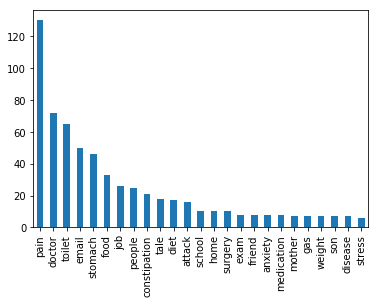

In [151]:
import matplotlib.pyplot as plt
top_topics.plot('bar')
plt.show()

In [152]:
top_topics

pain            130
doctor           72
toilet           65
email            50
stomach          46
food             33
job              26
people           25
constipation     21
tale             18
diet             17
attack           16
school           10
home             10
surgery          10
exam              8
friend            8
anxiety           8
medication        8
mother            7
gas               7
weight            7
son               7
disease           7
stress            6
Name: 1, dtype: int64

In [156]:
results.to_csv('topics.csv')